In [1]:
import osmnx as ox
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
train = pd.read_csv('/kaggle/input/bizinnovate-2023/train.csv')
test = pd.read_csv('/kaggle/input/bizinnovate-2023/test_masked.csv')

In [3]:
geotrain = (gpd.GeoDataFrame(
                train, 
                crs="EPSG:4326", # specify the CRS
                geometry=gpd.points_from_xy(train["lon"], train["lat"])) # create geometry from coordinates
            ).to_crs("EPSG:7755")
geotrain["Easting"], geotrain["Northing"] = geotrain.geometry.x, geotrain.geometry.y
geotrain.head()

DHSID_EA cname  year       lat        lon  n_asset  asset_index  \
0  IA-2015-7-00010004    IA  2015  9.165413  92.742696     22.0     2.650768   
1  IA-2015-7-00010005    IA  2015  8.307356  93.093792     22.0     2.157784   
2  IA-2015-7-00010007    IA  2015  7.016968  93.893226     21.0     1.832751   
3  IA-2015-7-00010016    IA  2015  9.194938  92.800432     22.0     2.746096   
4  IA-2015-7-00010018    IA  2015  8.055606  93.543892     22.0     2.581869   

   n_water  water_index  cluster_id  adm1dhs urban  \
0     22.0     5.000000       10004        1     R   
1     22.0     5.000000       10005        1     R   
2     21.0     4.619048       10007        1     R   
3     22.0     5.000000       10016        1     R   
4     22.0     5.000000       10018        1     R   

                               path                         geometry  \
0  dhs_train/IA-2015-7-00010004.npz  POINT (5416606.481 2436667.776)   
1  dhs_train/IA-2015-7-00010005.npz  POINT (5464464.046 2344356.890)   
2  dhs_train/IA-2015-7-00010007.npz  POINT (5567922.849 2208082.479)   
3  dhs_train/IA-2015-7-00010016.npz  POINT (5422707.281 2440543.195)   
4  dhs_train/IA-2015-7-00010018.npz  POINT (5517371.176 2320920.304)   

        Easting      Northing  
0  5.416606e+06  2.436668e+06  
1  5.464464e+06  2.344357e+06  
2  5.567923e+06  2.208082e+06  
3  5.422707e+06  2.440543e+06  
4  5.517371e+06  2.320920e+06

In [4]:
geotest = (gpd.GeoDataFrame(
            test, 
            crs="EPSG:4326", # specify the CRS
            geometry=gpd.points_from_xy(test["lon"], test["lat"])) # create geometry from coordinate
            ).to_crs("EPSG:7755")
geotest["Easting"], geotest["Northing"] = geotest.geometry.x, geotest.geometry.y
geotest.head()

DHSID_EA cname  year        lat        lon  n_asset  asset_index  \
0  IA-2015-7-00010009    IA  2015   9.220903  92.781530     22.0     2.721812   
1  IA-2015-7-00010011    IA  2015   7.028410  93.883430     20.0     2.287279   
2  IA-2015-7-00010017    IA  2015  12.371448  92.783665     22.0     0.677109   
3  IA-2015-7-00010044    IA  2015  11.727304  92.719257     21.0     1.793683   
4  IA-2015-7-00010060    IA  2015   9.185310  92.777645     22.0     2.758168   

   cluster_id  adm1dhs urban                              path  \
0       10009        1     R  dhs_valid/IA-2015-7-00010009.npz   
1       10011        1     R  dhs_valid/IA-2015-7-00010011.npz   
2       10017        1     R  dhs_valid/IA-2015-7-00010017.npz   
3       10044        1     R  dhs_valid/IA-2015-7-00010044.npz   
4       10060        1     R  dhs_valid/IA-2015-7-00010060.npz   

                          geometry       Easting      Northing  
0  POINT (5420348.782 2443248.747)  5.420349e+06  2.443249e+06  
1  POINT (5566693.545 2209261.774)  5.566694e+06  2.209262e+06  
2  POINT (5388812.515 2792492.064)  5.388813e+06  2.792492e+06  
3  POINT (5388267.741 2720787.926)  5.388268e+06  2.720788e+06  
4  POINT (5420279.276 2439239.328)  5.420279e+06  2.439239e+06

In [5]:
# get India shapefile
india = gpd.read_file('/kaggle/input/india-gis-data/India States/Indian_states.shp')
india.head()

st_nm                                           geometry
0  Andaman & Nicobar Island  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...
1        Arunanchal Pradesh  POLYGON ((96.16261 29.38078, 96.16860 29.37432...
2                     Assam  MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...
3                     Bihar  MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...
4                Chandigarh  POLYGON ((76.84147 30.75996, 76.83599 30.73623...

In [6]:
india['centroid'] = india['geometry'].centroid
india.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


st_nm  \
0  Andaman & Nicobar Island   
1        Arunanchal Pradesh   
2                     Assam   
3                     Bihar   
4                Chandigarh   

                                            geometry  \
0  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...   
1  POLYGON ((96.16261 29.38078, 96.16860 29.37432...   
2  MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...   
3  MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...   
4  POLYGON ((76.84147 30.75996, 76.83599 30.73623...   

                    centroid  
0  POINT (92.96152 11.21666)  
1  POINT (94.67916 28.03557)  
2  POINT (92.83146 26.35336)  
3  POINT (85.61184 25.67937)  
4  POINT (76.78147 30.73006)

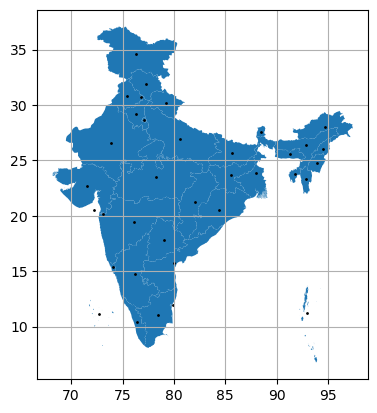

In [7]:
india['geometry'].plot()
plt.scatter(india['centroid'].x, india['centroid'].y, c='black', s=1)
plt.grid()

In [8]:
# merge geodataframes
result = gpd.sjoin(geotrain.to_crs("EPSG:4326"), india.to_crs("EPSG:4326"), how='left')
result = result.drop(columns='index_right')

result2 = gpd.sjoin(geotest.to_crs("EPSG:4326"), india.to_crs("EPSG:4326"), how='left')
result2 = result2.drop(columns='index_right')

result.head()

DHSID_EA cname  year       lat        lon  n_asset  asset_index  \
0  IA-2015-7-00010004    IA  2015  9.165413  92.742696     22.0     2.650768   
1  IA-2015-7-00010005    IA  2015  8.307356  93.093792     22.0     2.157784   
2  IA-2015-7-00010007    IA  2015  7.016968  93.893226     21.0     1.832751   
3  IA-2015-7-00010016    IA  2015  9.194938  92.800432     22.0     2.746096   
4  IA-2015-7-00010018    IA  2015  8.055606  93.543892     22.0     2.581869   

   n_water  water_index  cluster_id  adm1dhs urban  \
0     22.0     5.000000       10004        1     R   
1     22.0     5.000000       10005        1     R   
2     21.0     4.619048       10007        1     R   
3     22.0     5.000000       10016        1     R   
4     22.0     5.000000       10018        1     R   

                               path                  geometry       Easting  \
0  dhs_train/IA-2015-7-00010004.npz  POINT (92.74270 9.16541)  5.416606e+06   
1  dhs_train/IA-2015-7-00010005.npz  POINT (93.09379 8.30736)  5.464464e+06   
2  dhs_train/IA-2015-7-00010007.npz  POINT (93.89323 7.01697)  5.567923e+06   
3  dhs_train/IA-2015-7-00010016.npz  POINT (92.80043 9.19494)  5.422707e+06   
4  dhs_train/IA-2015-7-00010018.npz  POINT (93.54389 8.05561)  5.517371e+06   

       Northing                     st_nm                   centroid  
0  2.436668e+06  Andaman & Nicobar Island  POINT (92.96152 11.21666)  
1  2.344357e+06  Andaman & Nicobar Island  POINT (92.96152 11.21666)  
2  2.208082e+06  Andaman & Nicobar Island  POINT (92.96152 11.21666)  
3  2.440543e+06  Andaman & Nicobar Island  POINT (92.96152 11.21666)  
4  2.320920e+06  Andaman & Nicobar Island  POINT (92.96152 11.21666)

In [9]:
# calculate distance to city center; must convert coordinate reference system (meters)
result['city_dist'] = result['geometry'].to_crs("EPSG:7755").distance(result['centroid'].to_crs("EPSG:7755"))

result2['city_dist'] = result2['geometry'].to_crs("EPSG:7755").distance(result2['centroid'].to_crs("EPSG:7755"))

result.head()

DHSID_EA cname  year       lat        lon  n_asset  asset_index  \
0  IA-2015-7-00010004    IA  2015  9.165413  92.742696     22.0     2.650768   
1  IA-2015-7-00010005    IA  2015  8.307356  93.093792     22.0     2.157784   
2  IA-2015-7-00010007    IA  2015  7.016968  93.893226     21.0     1.832751   
3  IA-2015-7-00010016    IA  2015  9.194938  92.800432     22.0     2.746096   
4  IA-2015-7-00010018    IA  2015  8.055606  93.543892     22.0     2.581869   

   n_water  water_index  cluster_id  adm1dhs urban  \
0     22.0     5.000000       10004        1     R   
1     22.0     5.000000       10005        1     R   
2     21.0     4.619048       10007        1     R   
3     22.0     5.000000       10016        1     R   
4     22.0     5.000000       10018        1     R   

                               path                  geometry       Easting  \
0  dhs_train/IA-2015-7-00010004.npz  POINT (92.74270 9.16541)  5.416606e+06   
1  dhs_train/IA-2015-7-00010005.npz  POINT (93.09379 8.30736)  5.464464e+06   
2  dhs_train/IA-2015-7-00010007.npz  POINT (93.89323 7.01697)  5.567923e+06   
3  dhs_train/IA-2015-7-00010016.npz  POINT (92.80043 9.19494)  5.422707e+06   
4  dhs_train/IA-2015-7-00010018.npz  POINT (93.54389 8.05561)  5.517371e+06   

       Northing                     st_nm                   centroid  \
0  2.436668e+06  Andaman & Nicobar Island  POINT (92.96152 11.21666)   
1  2.344357e+06  Andaman & Nicobar Island  POINT (92.96152 11.21666)   
2  2.208082e+06  Andaman & Nicobar Island  POINT (92.96152 11.21666)   
3  2.440543e+06  Andaman & Nicobar Island  POINT (92.96152 11.21666)   
4  2.320920e+06  Andaman & Nicobar Island  POINT (92.96152 11.21666)   

       city_dist  
0  230105.665280  
1  325466.894090  
2  481979.112571  
3  226225.591044  
4  359319.075372

In [10]:
geotrain = result.copy()
geotest = result2.copy()

In [11]:
# get polar coordinate features
geotrain['x_cart'] = 6371 * np.cos(geotrain['lat']) * np.cos(geotrain['lon'])
geotrain['y_cart'] = 6371 * np.cos(geotrain['lat']) * np.sin(geotrain['lon'])
geotrain['z_cart'] = 6371 * np.sin(geotrain['lat'])
geotrain['rot_45_x'] = (0.707 * geotrain['lat']) + (0.707 * geotrain['lon'])
geotrain['rot_45_y'] = (0.707 * geotrain['lon']) + (0.707 * geotrain['lat'])
geotrain['rot_30_x'] = (0.866 * geotrain['lat']) + (0.5 * geotrain['lon'])
geotrain['rot_30_y'] = (0.866 * geotrain['lon']) + (0.5 * geotrain['lat'])

geotest['x_cart'] = 6371 * np.cos(geotest['lat']) * np.cos(geotest['lon'])
geotest['y_cart'] = 6371 * np.cos(geotest['lat']) * np.sin(geotest['lon'])
geotest['z_cart'] = 6371 * np.sin(geotest['lat'])
geotest['rot_45_x'] = (0.707 * geotest['lat']) + (0.707 * geotest['lon'])
geotest['rot_45_y'] = (0.707 * geotest['lon']) + (0.707 * geotest['lat'])
geotest['rot_30_x'] = (0.866 * geotest['lat']) + (0.5 * geotest['lon'])
geotest['rot_30_y'] = (0.866 * geotest['lon']) + (0.5 * geotest['lat'])

In [12]:
# import datetime as dt

# OPTION: can add other KPIs to supplement estimates
# air_qual = pd.read_csv('/kaggle/input/india-air-quality-data/data.csv', parse_dates=[-1], encoding='cp1252')
# air_qual['state'] = air_qual['state'].replace({'andaman-and-nicobar-islands': 'Andaman & Nicobar Island',
#                                                'Delhi': 'NCT of Delhi',
#                                                'Dadra & Nagar Haveli': 'Dadara & Nagar Havelli',
#                                                'Arunachal Pradesh': 'Arunanchal Pradesh'})
# air_qual['state'].unique()

In [13]:
# list(set(geotrain['st_nm'].unique()) - set(air_qual['state'].unique()))

In [14]:
# air_qual_group = air_qual.groupby('state')
# air_qual_state = air_qual_group.tail(1)[['state', 'so2', 'no2', 'rspm']] # get most recent entry for each state

In [15]:
# geotrain = geotrain.merge(air_qual_state, how='left', left_on='st_nm', right_on='state')
# geotest = geotest.merge(air_qual_state, how='left', left_on='st_nm', right_on='state')

# geotrain.head()

In [16]:
from sklearn.decomposition import PCA

# get rotational coordinates with PCA
pca = PCA().fit(geotrain[['lat', 'lon']])
pca_x = pca.transform(geotrain[['lat', 'lon']])[:, 0]
pca_y = pca.transform(geotrain[['lat', 'lon']])[:, 1]
geotrain['pca_x'] = pca_x
geotrain['pca_y'] = pca_y

In [17]:
pca_x = pca.transform(geotest[['lat', 'lon']])[:, 0]
pca_y = pca.transform(geotest[['lat', 'lon']])[:, 1]
geotest['pca_x'] = pca_x
geotest['pca_y'] = pca_y

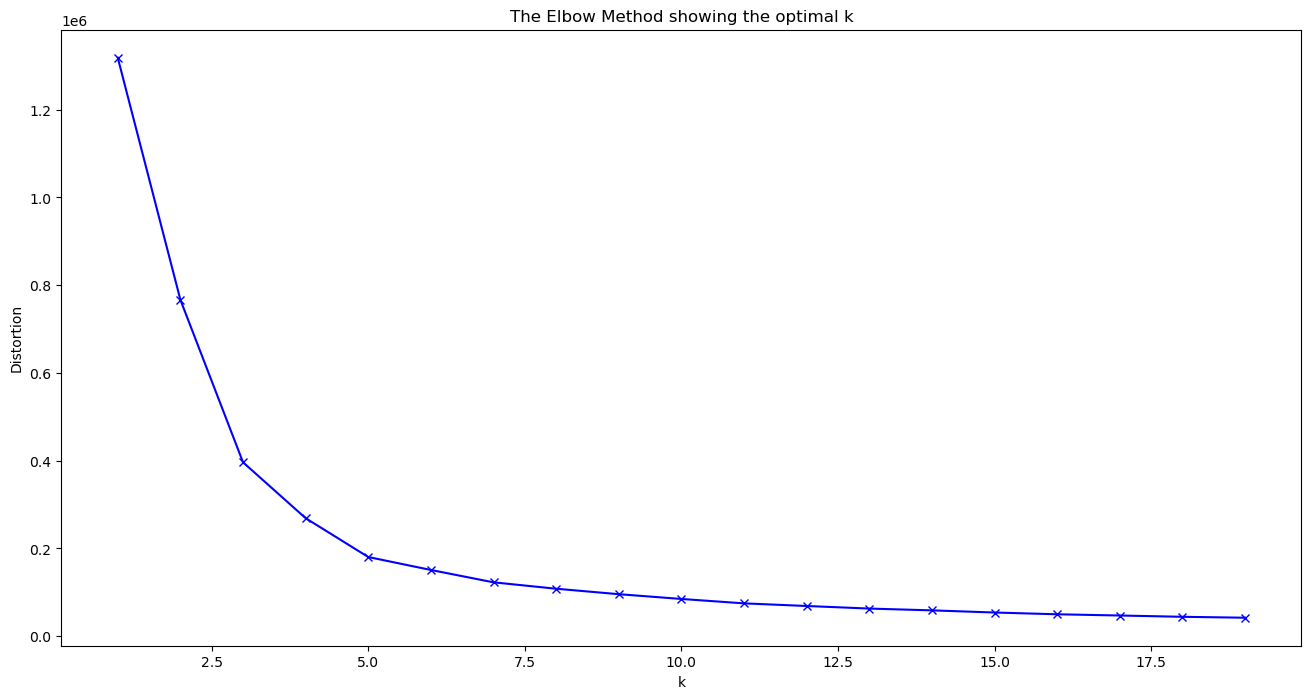

In [18]:
from sklearn.cluster import KMeans

# identify clusters
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(geotrain[['lat', 'lon']])
    distortions.append(kmeanModel.inertia_)

# elbow is around 5
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [19]:
km = KMeans(n_clusters=5)
train_labels = km.fit_predict(geotrain[['lat', 'lon']])
test_labels = km.predict(geotest[['lat', 'lon']])

geotrain['km_cluster'] = train_labels
geotest['km_cluster'] = test_labels

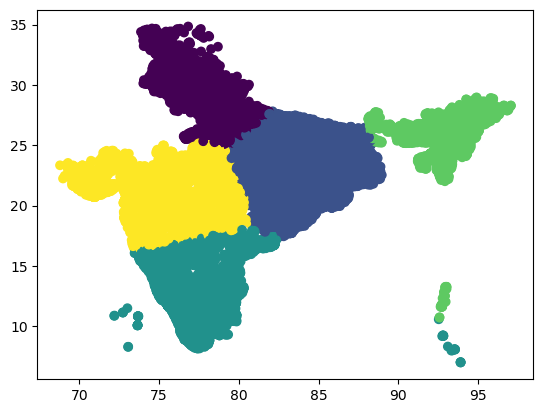

In [20]:
plt.scatter(geotrain['lon'], geotrain['lat'], c=geotrain['km_cluster'])
plt.show()

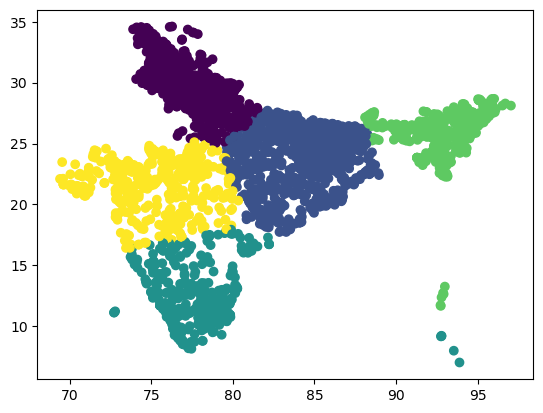

In [21]:
plt.scatter(geotest['lon'], geotest['lat'], c=geotest['km_cluster'])
plt.show()

In [22]:
# seems like possible multicollinearity, though this is not necessarily relevant for prediction problems (https://datascience.stackexchange.com/questions/24452/in-supervised-learning-why-is-it-bad-to-have-correlated-features#:~:text=However%2C%20when%20independent%20variables%20are,one%20variable%20without%20changing%20another.)
corr = geotrain.corr()
corr.style.background_gradient(cmap='coolwarm')

/opt/conda/lib/python3.7/site-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/opt/conda/lib/python3.7/site-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


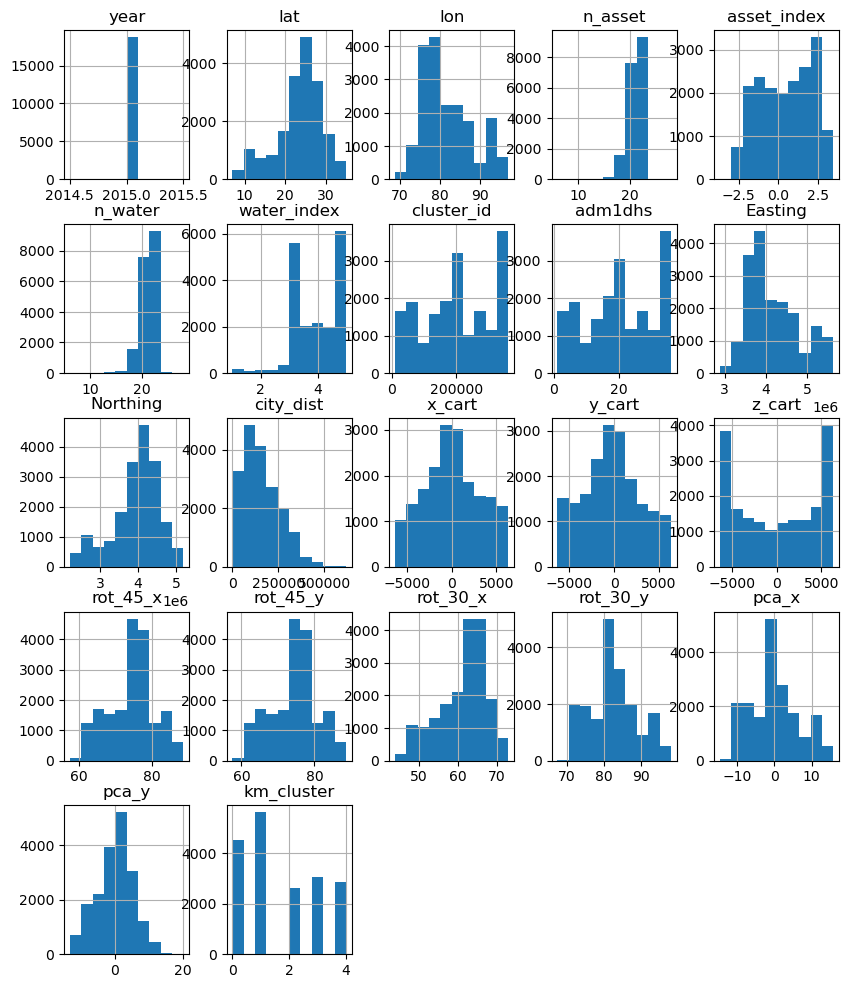

In [23]:
geotrain.hist(figsize=(10,12))
plt.show();

In [24]:
x = geotrain[['Easting', 'Northing']]
p = geotrain.drop(columns=['Easting', 'Northing', 'lat', 'lon', 'water_index'])
target = geotrain['water_index']

In [25]:
!pip install pykrige

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.5/805.5 kB 24.6 MB/s eta 0:00:00


In [26]:
from pykrige.compat import train_test_split
# 60% train, 40% validation; kriging is very memory intensive
p_train, p_valid, x_train, x_valid, y_train, y_valid = train_test_split(p, x, target, test_size=0.4, random_state=123)
p_train.head()

DHSID_EA cname  year  n_asset  asset_index  n_water  \
14291  IA-2015-7-00310563    IA  2015     22.0     0.348256     22.0   
3697   IA-2015-7-00110006    IA  2015     21.0     0.637245     21.0   
2401   IA-2015-7-00051094    IA  2015     22.0    -2.559852     22.0   
16755  IA-2015-7-00334515    IA  2015     22.0     2.212792     22.0   
11816  IA-2015-7-00240506    IA  2015     22.0     0.628310     22.0   

       cluster_id  adm1dhs urban                              path  ...  \
14291      310563       31     R  dhs_train/IA-2015-7-00310563.npz  ...   
3697       110006       11     R  dhs_train/IA-2015-7-00110006.npz  ...   
2401        51094        5     R  dhs_train/IA-2015-7-00051094.npz  ...   
16755      334515       33     U  dhs_train/IA-2015-7-00334515.npz  ...   
11816      240506       24     R  dhs_train/IA-2015-7-00240506.npz  ...   

            x_cart       y_cart       z_cart   rot_45_x   rot_45_y   rot_30_x  \
14291    43.023531   -87.428446 -6370.254802  62.503471  62.503471  48.222086   
3697  -3020.440761  1391.385173 -5434.208858  67.826796  67.826796  56.792697   
2401  -6209.421415  -400.209474  1368.414801  77.937263  77.937263  64.396103   
16755  5320.167341 -2503.403400  2453.249249  74.927196  74.927196  63.193265   
11816  4972.458325   514.462519  3949.636379  84.947664  84.947664  69.519456   

        rot_30_y      pca_x     pca_y  km_cluster  
14291  72.541339  -9.462834  9.275411           2  
3697   74.255963  -8.626925 -4.975744           4  
2401   86.187066   3.618885 -0.264088           1  
16755  81.574132  -1.330325 -5.553101           0  
11816  94.608562  12.292596  3.547636           3  

[5 rows x 24 columns]

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, QuantileTransformer
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import RFE

transformer = make_column_transformer(
    (make_pipeline(SimpleImputer(strategy="median"), QuantileTransformer(n_quantiles=4)), ['asset_index', 'x_cart', 'y_cart', 'z_cart',
                                                                                           'rot_45_x', 'rot_45_y', 'rot_30_x', 'rot_30_y',
                                                                                           'city_dist', 'pca_x', 'pca_y']),
    (OneHotEncoder(drop="if_binary", handle_unknown="ignore", sparse=False), ['urban', 'st_nm', 'km_cluster']),
    ('drop', ['DHSID_EA', 'cname', 'year', 'n_asset', 'n_water', 'cluster_id', 'adm1dhs', 'path', 'centroid'])
)

# feature selection
rfe = RFE(RidgeCV())

pipe = make_pipeline(transformer, rfe)
p_train_enc = pipe.fit_transform(p_train, y_train)
p_valid_enc = pipe.transform(p_valid)

In [28]:
# 24 features kept
p_train_enc.shape

(11233, 27)

In [29]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMRegressor

# hyperparameter tuning
param_test = {'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
              'n_estimators' : [100, 200, 300, 400, 500],
              'num_leaves': sp_randint(6, 50), 
              'min_child_samples': sp_randint(100, 500), 
              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
              'subsample': sp_uniform(loc = 0.2, scale = 0.8), 
              'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],
              'colsample_bytree': sp_uniform(loc = 0.4, scale = 0.6),
              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

# note: other regressors (random forest, decision trees, kdtrees, etc.)
# were assessed, but only a subset of models are tuned here for brevity
rand_search = RandomizedSearchCV(
    estimator = LGBMRegressor(), param_distributions = param_test, 
    n_iter = 100,
    scoring = 'r2',
    cv = 5,
    refit = True,
    random_state = 42,
    verbose = True
)

rand_search.fit(p_train_enc, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=100,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7feb6ab89cd0>,
                                        'learning_rate': [0.01, 0.02, 0.03,
                                                          0.04, 0.05, 0.08, 0.1,
                                                          0.2, 0.3, 0.4],
                                        'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7feb6ab89350...
                                                             0.1, 1, 10.0,
                                                             100.0, 1000.0,
                                                             10000.0],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500

In [30]:
rand_search.best_params_

{'colsample_bytree': 0.9382661559715463,
 'learning_rate': 0.2,
 'max_depth': 5,
 'min_child_samples': 219,
 'min_child_weight': 1e-05,
 'n_estimators': 400,
 'num_leaves': 16,
 'reg_alpha': 0,
 'reg_lambda': 100,
 'subsample': 0.828272520891155}

In [31]:
from hyperopt import hp, Trials, STATUS_OK, tpe, fmin
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor

# Cornell's course on boosting - https://www.cs.cornell.edu/courses/cs4780/2018sp/lectures/lecturenote19.html
xgb_space = {'max_depth': hp.quniform("max_depth", 3, 18, 1),
             'gamma': hp.uniform ('gamma', 1,9),
             'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
             'reg_lambda' : hp.uniform('reg_lambda', 0,1),
             'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
             'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
             'n_estimators': 180,
             'seed': 0
            }

# define optimization space
def xgb_objective(space):
    reg = XGBRegressor(
        n_estimators=space['n_estimators'], max_depth=int(space['max_depth']), gamma=space['gamma'],
        reg_alpha=int(space['reg_alpha']), min_child_weight=int(space['min_child_weight']),
        colsample_bytree=int(space['colsample_bytree']), eval_metric=mean_squared_error)
    
    evaluation = [(p_train_enc, y_train), (p_valid_enc, y_valid)]
    
    reg.fit(p_train_enc, y_train,
            eval_set=evaluation,
            early_stopping_rounds=10,
            verbose=False)

    pred = reg.predict(p_valid_enc)
    r2 = r2_score(y_valid, pred)
    print ("SCORE:", r2)
    return {'loss': -r2, 'status': STATUS_OK}

trials = Trials()

xgb_hyperparams = fmin(fn = xgb_objective,
                        space = xgb_space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5733977474829718
  1%|          | 1/100 [00:01<01:48,  1.10s/trial, best loss: -0.5733977474829718]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5972134214436995
  2%|▏         | 2/100 [00:02<01:48,  1.10s/trial, best loss: -0.5972134214436995]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5715951943940207
  3%|▎         | 3/100 [00:03<01:42,  1.05s/trial, best loss: -0.5972134214436995]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5727775361331644
  4%|▍         | 4/100 [00:04<01:41,  1.06s/trial, best loss: -0.5972134214436995]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.589738631556856
  5%|▌         | 5/100 [00:05<01:40,  1.06s/trial, best loss: -0.5972134214436995]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.592618443510815
  6%|▌         | 6/100 [00:06<01:41,  1.08s/trial, best loss: -0.5972134214436995]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5997797547628171
  7%|▋         | 7/100 [00:07<01:46,  1.14s/trial, best loss: -0.5997797547628171]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5824458547669558
  8%|▊         | 8/100 [00:08<01:42,  1.12s/trial, best loss: -0.5997797547628171]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5694873733523149
  9%|▉         | 9/100 [00:09<01:39,  1.09s/trial, best loss: -0.5997797547628171]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5689745385656633
 10%|█         | 10/100 [00:10<01:35,  1.06s/trial, best loss: -0.5997797547628171]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5981436767446665
 11%|█         | 11/100 [00:12<01:42,  1.16s/trial, best loss: -0.5997797547628171]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5732876935668584
 12%|█▏        | 12/100 [00:13<01:38,  1.11s/trial, best loss: -0.5997797547628171]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5664293445448239
 13%|█▎        | 13/100 [00:14<01:33,  1.08s/trial, best loss: -0.5997797547628171]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.6078919278438657
 14%|█▍        | 14/100 [00:15<01:39,  1.15s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5697668800351707
 15%|█▌        | 15/100 [00:16<01:34,  1.11s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.568782080746012
 16%|█▌        | 16/100 [00:17<01:30,  1.07s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5735317478237952
 17%|█▋        | 17/100 [00:18<01:27,  1.06s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5821755826036793
 18%|█▊        | 18/100 [00:19<01:27,  1.07s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5702562913439575
 19%|█▉        | 19/100 [00:20<01:25,  1.05s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5747985838733882
 20%|██        | 20/100 [00:21<01:23,  1.04s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.603783218724025
 21%|██        | 21/100 [00:23<01:29,  1.13s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.6035879096760262
 22%|██▏       | 22/100 [00:24<01:32,  1.19s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.6033577060840074
 23%|██▎       | 23/100 [00:25<01:34,  1.23s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.6028435118688494
 24%|██▍       | 24/100 [00:27<01:36,  1.27s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5805535140726572
 25%|██▌       | 25/100 [00:28<01:31,  1.22s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5964038102515481
 26%|██▌       | 26/100 [00:29<01:28,  1.20s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5871996965808983
 27%|██▋       | 27/100 [00:30<01:25,  1.17s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.6073763864521389
 28%|██▊       | 28/100 [00:31<01:28,  1.23s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.6057946134584486
 29%|██▉       | 29/100 [00:33<01:30,  1.28s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5804874927139893
 30%|███       | 30/100 [00:34<01:26,  1.24s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.6048668865812294
 31%|███       | 31/100 [00:35<01:28,  1.28s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5680646034867378
 32%|███▏      | 32/100 [00:36<01:22,  1.21s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5969501787078668
 33%|███▎      | 33/100 [00:37<01:20,  1.20s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5884158910437595
 34%|███▍      | 34/100 [00:39<01:17,  1.18s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.597044975676992
 35%|███▌      | 35/100 [00:40<01:15,  1.16s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5986650439763064
 36%|███▌      | 36/100 [00:41<01:18,  1.22s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5864389214674964
 37%|███▋      | 37/100 [00:42<01:17,  1.23s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.6026200176028711
 38%|███▊      | 38/100 [00:44<01:18,  1.27s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5789537581450372
 39%|███▉      | 39/100 [00:45<01:15,  1.24s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.593417070685494
 40%|████      | 40/100 [00:46<01:13,  1.22s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.576598585939319
 41%|████      | 41/100 [00:47<01:11,  1.21s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5974553527119498
 42%|████▏     | 42/100 [00:48<01:09,  1.20s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.6058273411275836
 43%|████▎     | 43/100 [00:50<01:11,  1.25s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5820710716059978
 44%|████▍     | 44/100 [00:51<01:08,  1.22s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5971626023935147
 45%|████▌     | 45/100 [00:52<01:05,  1.20s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5870645291038822
 46%|████▌     | 46/100 [00:53<01:03,  1.18s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5953872808865996
 47%|████▋     | 47/100 [00:54<01:02,  1.17s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5807150126151452
 48%|████▊     | 48/100 [00:56<01:03,  1.22s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5850928555809536
 49%|████▉     | 49/100 [00:57<01:00,  1.19s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5671543043125198
 50%|█████     | 50/100 [00:58<00:57,  1.14s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.57634910323302
 51%|█████     | 51/100 [00:59<00:55,  1.14s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5683670425371519
 52%|█████▏    | 52/100 [01:00<00:53,  1.11s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5970182392486918
 53%|█████▎    | 53/100 [01:01<00:53,  1.13s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.6010928009261423
 54%|█████▍    | 54/100 [01:02<00:55,  1.20s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.592075294040992
 55%|█████▌    | 55/100 [01:04<00:53,  1.19s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5723283658142229
 56%|█████▌    | 56/100 [01:05<00:50,  1.15s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.6008131202113702
 57%|█████▋    | 57/100 [01:06<00:49,  1.14s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5826802599983034
 58%|█████▊    | 58/100 [01:07<00:47,  1.13s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5694230423075055
 59%|█████▉    | 59/100 [01:08<00:45,  1.10s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5977604155939849
 60%|██████    | 60/100 [01:09<00:44,  1.12s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5971458203830593
 61%|██████    | 61/100 [01:10<00:46,  1.19s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5689492676872175
 62%|██████▏   | 62/100 [01:11<00:43,  1.14s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5974974179939871
 63%|██████▎   | 63/100 [01:13<00:43,  1.17s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.6053756138276936
 64%|██████▍   | 64/100 [01:14<00:44,  1.23s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5765483595381142
 65%|██████▌   | 65/100 [01:15<00:42,  1.21s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.605429262269738
 66%|██████▌   | 66/100 [01:17<00:43,  1.27s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.6047744269563464
 67%|██████▋   | 67/100 [01:18<00:43,  1.31s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5928109387212945
 68%|██████▊   | 68/100 [01:19<00:40,  1.25s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.6045159589558067
 69%|██████▉   | 69/100 [01:21<00:39,  1.28s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.6062080557539364
 70%|███████   | 70/100 [01:22<00:39,  1.30s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.6019022680507913
 71%|███████   | 71/100 [01:23<00:38,  1.32s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.6056746213525729
 72%|███████▏  | 72/100 [01:25<00:37,  1.33s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5960538576320424
 73%|███████▎  | 73/100 [01:26<00:36,  1.34s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5901058858473831
 74%|███████▍  | 74/100 [01:27<00:34,  1.33s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.6008719571388517
 75%|███████▌  | 75/100 [01:29<00:33,  1.33s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5981390797306236
 76%|███████▌  | 76/100 [01:30<00:31,  1.32s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5814658324268158
 77%|███████▋  | 77/100 [01:31<00:29,  1.26s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.6003286880690891
 78%|███████▊  | 78/100 [01:32<00:26,  1.22s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5876605879317659
 79%|███████▉  | 79/100 [01:33<00:26,  1.25s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5801933704645412
 80%|████████  | 80/100 [01:35<00:24,  1.21s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.6046052062777274
 81%|████████  | 81/100 [01:36<00:23,  1.24s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5972325099884259
 82%|████████▏ | 82/100 [01:37<00:21,  1.21s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.6043890674321805
 83%|████████▎ | 83/100 [01:38<00:21,  1.24s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5934156576739822
 84%|████████▍ | 84/100 [01:39<00:19,  1.21s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.6002071367233428
 85%|████████▌ | 85/100 [01:41<00:18,  1.24s/trial, best loss: -0.6078919278438657]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.6090828413845655
 86%|████████▌ | 86/100 [01:42<00:18,  1.35s/trial, best loss: -0.6090828413845655]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5993484672192883
 87%|████████▋ | 87/100 [01:44<00:16,  1.29s/trial, best loss: -0.6090828413845655]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.585675986241761
 88%|████████▊ | 88/100 [01:45<00:14,  1.24s/trial, best loss: -0.6090828413845655]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5707903229190532
 89%|████████▉ | 89/100 [01:46<00:12,  1.17s/trial, best loss: -0.6090828413845655]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5894828745360219
 90%|█████████ | 90/100 [01:47<00:12,  1.21s/trial, best loss: -0.6090828413845655]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5852826186033699
 91%|█████████ | 91/100 [01:48<00:11,  1.24s/trial, best loss: -0.6090828413845655]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5911055756595971
 92%|█████████▏| 92/100 [01:50<00:10,  1.27s/trial, best loss: -0.6090828413845655]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.6005790524411054
 93%|█████████▎| 93/100 [01:51<00:08,  1.28s/trial, best loss: -0.6090828413845655]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5802921853896099
 94%|█████████▍| 94/100 [01:52<00:07,  1.23s/trial, best loss: -0.6090828413845655]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5947033045540742
 95%|█████████▌| 95/100 [01:53<00:05,  1.19s/trial, best loss: -0.6090828413845655]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5986950309118197
 96%|█████████▌| 96/100 [01:54<00:04,  1.17s/trial, best loss: -0.6090828413845655]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5703531618983988
 97%|█████████▋| 97/100 [01:55<00:03,  1.13s/trial, best loss: -0.6090828413845655]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.6005128233435142
 98%|█████████▊| 98/100 [01:57<00:02,  1.17s/trial, best loss: -0.6090828413845655]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.6049129723070471
 99%|█████████▉| 99/100 [01:58<00:01,  1.22s/trial, best loss: -0.6090828413845655]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,



SCORE:
0.5996026639257488
100%|██████████| 100/100 [01:59<00:00,  1.20s/trial, best loss: -0.6090828413845655]


In [32]:
# unfortunately overfits to the training data
xgb_hyperparams

{'colsample_bytree': 0.7610533972810453,
 'gamma': 1.1936881777776838,
 'max_depth': 7.0,
 'min_child_weight': 6.0,
 'reg_alpha': 58.0,
 'reg_lambda': 0.5223606322533139}

In [33]:
from sklearn.model_selection import cross_val_score

# define params
lgbm_space = {
    'learning_rate':    hp.uniform('learning_rate',0.1,1),
    'max_depth':        hp.choice('max_depth', np.arange(2, 100, 1, dtype=int)),
    'min_child_weight': hp.choice('min_child_weight', np.arange(1, 50, 1, dtype=int)),
    'colsample_bytree': hp.uniform('colsample_bytree',0.4,1),
    'subsample':        hp.uniform('subsample', 0.6, 1),
    'num_leaves':       hp.choice('num_leaves', np.arange(2, 200, 1, dtype=int)),
    'min_split_gain':   hp.uniform('min_split_gain', 0, 1),
    'reg_alpha':        hp.uniform('reg_alpha',0,1),
    'reg_lambda':       hp.uniform('reg_lambda',0,1),
    'n_estimators':     5
}

# define optimization space
def lgbm_objective(lgbm_space):
    lgbm = LGBMRegressor(n_jobs=-1, early_stopping_rounds=None, **lgbm_space)
    score = cross_val_score(lgbm, p_train_enc, y_train, cv=5, scoring='r2', n_jobs=-1).mean()
    return score

trials = Trials()
lgbm_hyperparameters = fmin(
    fn = lgbm_objective,              # objective function
    space = lgbm_space,               # parameter space
    algo = tpe.suggest,               # surrogate algorithm
    max_evals = 100,                  # no. of evaluations
    trials = trials                   # trials object that keeps track of the sample results (optional)
)

100%|██████████| 100/100 [00:52<00:00,  1.91trial/s, best loss: 0.2725789237736422]


In [34]:
# unfortunately overfits to the training data
lgbm_hyperparameters

{'colsample_bytree': 0.4118207911019437,
 'learning_rate': 0.10082410397465236,
 'max_depth': 69,
 'min_child_weight': 2,
 'min_split_gain': 0.005254218542910207,
 'num_leaves': 28,
 'reg_alpha': 0.41361571315825973,
 'reg_lambda': 0.5953029731421954,
 'subsample': 0.603534097274883}

In [35]:
# convert to array for compatibility with pykridge
x_train = x_train.to_numpy()
x_valid = x_valid.to_numpy()

In [36]:
!pip install scikit-gstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 688.0/688.0 kB 23.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for scikit-gstat: filename=scikit_gstat-1.0.9-py3-none-any.whl size=702914 sha256=5d52c7e638a69aa7deb7441e7d358697c60486d16f1ab54bae88dbcf65816ce0
  Stored in directory: /root/.cache/pip/wheels/ac/d1/c0/49e8b9cb7c379f579730c865a99cf0101e04f2ed0f9ad28adf
Successfully built scikit-gstat


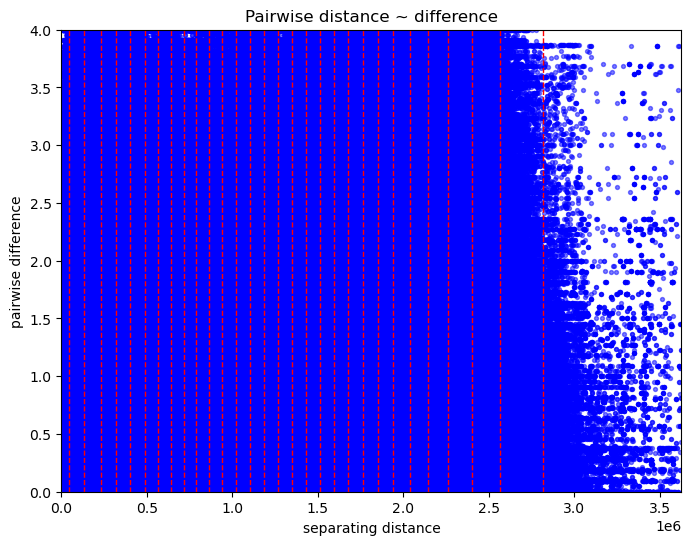

In [37]:
import warnings
from skgstat import Variogram

# determine variogram model
warnings.filterwarnings("ignore")  # Silence some warnings
train_subset = resample(geotrain, n_samples=8000, random_state=888) # downsample or computation takes a long time otherwise...
vario = Variogram(coordinates=train_subset[["Easting", "Northing"]],
                  values=train_subset["water_index"],
                  use_nugget=True, # adding a nugget captures small-scale variability
                  bin_func='kmeans',
                  n_lags=30)
vario.distance_difference_plot();

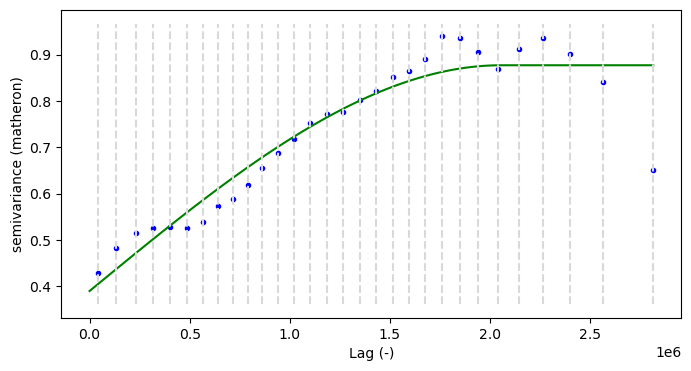

In [38]:
# points further than 2000km (range) are too far away to have any impactful spatial autocorrelation
vario.plot(hist=False);

In [39]:
print(vario)

spherical Variogram
-------------------
Estimator:         matheron
Effective Range:   2055719.41
Sill:              0.49
Nugget:            0.39
        


In [40]:
vario.describe()

{'model': 'spherical',
 'estimator': 'matheron',
 'dist_func': 'euclidean',
 'normalized_effective_range': 5787003749540.96,
 'normalized_sill': 0.457688081983648,
 'normalized_nugget': 0.3658864446688472,
 'effective_range': 2055719.4131485978,
 'sill': 0.48734996637925954,
 'nugget': 0.38959884149738505,
 'params': {'estimator': 'matheron',
  'model': 'spherical',
  'dist_func': 'euclidean',
  'bin_func': 'kmeans',
  'normalize': False,
  'fit_method': 'trf',
  'fit_sigma': None,
  'use_nugget': True,
  'maxlag': None,
  'n_lags': 30,
  'verbose': False},
 'kwargs': {}}

Most likely spherical (theoretical variogram visualized above):
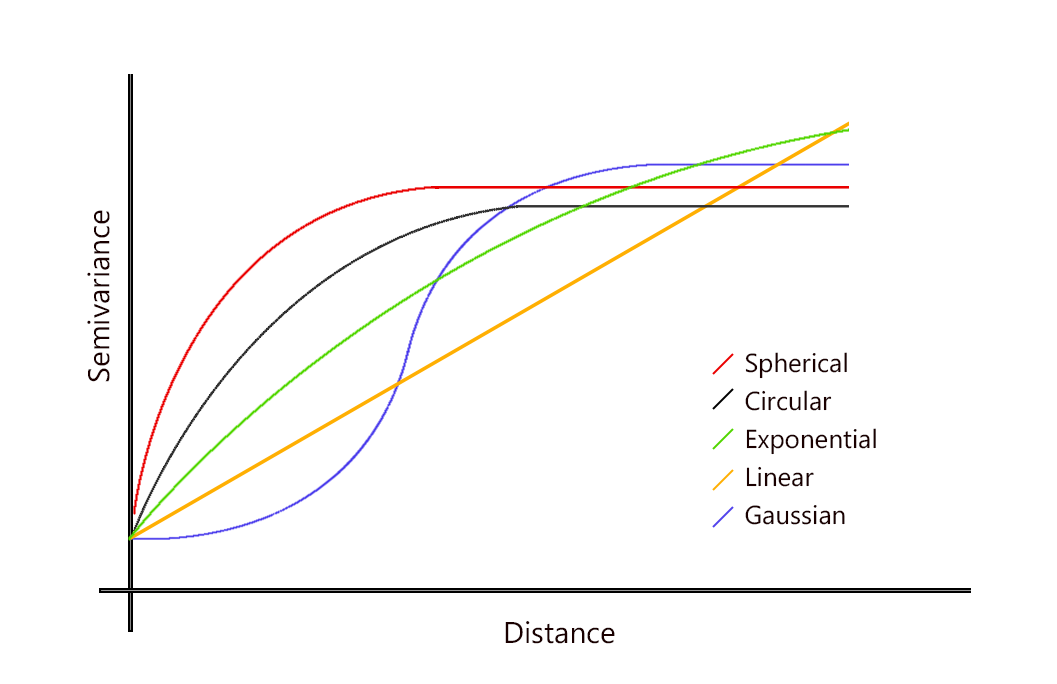

In [41]:
from pykrige.rk import RegressionKriging

lgbm_rk = RegressionKriging(regression_model=rand_search.best_estimator_,
                            n_closest_points=15,
                            nlags=30,
                            variogram_model="spherical",
                            variogram_parameters={"sill": vario.describe()["sill"],
                                                  "range": vario.describe()["effective_range"],
                                                  "nugget": vario.describe()['nugget']})
lgbm_rk.fit(p_train_enc, x_train, y_train)
print('Regression Train Score: ', lgbm_rk.regression_model.score(p_train_enc, y_train))
print('Regression Valid Score: ', lgbm_rk.regression_model.score(p_valid_enc, y_valid))
print('RK Train Score: ', lgbm_rk.score(p_train_enc, x_train, y_train))
print('RK Valid Score: ', lgbm_rk.score(p_valid_enc, x_valid, y_valid))

Finished learning regression model
Finished kriging residuals
Regression Train Score:  0.7697225964962066
Regression Valid Score:  0.7218562761876093
RK Train Score:  1.0
RK Valid Score:  0.7281132260071794


In [42]:
ridge_rk = RegressionKriging(regression_model=RidgeCV(),
                             n_closest_points=15,
                             nlags=30,
                             variogram_model="spherical",
                             variogram_parameters={"sill": vario.describe()["sill"],
                                                   "range": vario.describe()["effective_range"],
                                                   "nugget": vario.describe()['nugget']})
ridge_rk.fit(p_train_enc, x_train, y_train)
print('Regression Train Score: ', ridge_rk.regression_model.score(p_train_enc, y_train))
print('Regression Valid Score: ', ridge_rk.regression_model.score(p_valid_enc, y_valid))
print('RK Train Score: ', ridge_rk.score(p_train_enc, x_train, y_train))
print('RK Valid Score: ', ridge_rk.score(p_valid_enc, x_valid, y_valid))

Finished learning regression model
Finished kriging residuals
Regression Train Score:  0.6250689935166643
Regression Valid Score:  0.6338465207134675
RK Train Score:  1.0
RK Valid Score:  0.6750159521075823


In [43]:
xgb_rk = RegressionKriging(regression_model=XGBRegressor(colsample_bytree=0.7234646950126852,
                                                         gamma=1.0310208669481065,
                                                         max_depth=5,
                                                         min_child_weight=5,
                                                         reg_alpha=40.0,
                                                         reg_lambda=0.39142179880265615),
                           n_closest_points=15,
                           nlags=30,
                           variogram_model="spherical",
                           variogram_parameters={"sill": vario.describe()["sill"],
                                                 "range": vario.describe()["effective_range"],
                                                 "nugget": vario.describe()['nugget']})
xgb_rk.fit(p_train_enc, x_train, y_train)
print('Regression Train Score: ', xgb_rk.regression_model.score(p_train_enc, y_train))
print('Regression Valid Score: ', xgb_rk.regression_model.score(p_valid_enc, y_valid))
print('RK Train Score: ', xgb_rk.score(p_train_enc, x_train, y_train))
print('RK Valid Score: ', xgb_rk.score(p_valid_enc, x_valid, y_valid))

Finished learning regression model
Finished kriging residuals
Regression Train Score:  0.700391942287163
Regression Valid Score:  0.6975279898339573
RK Train Score:  1.0
RK Valid Score:  0.7241165936947729


In [44]:
from sklearn.ensemble import StackingRegressor, VotingRegressor

regressors = {
    "XGBoost": XGBRegressor(colsample_bytree=0.7234646950126852,
                            gamma=1.0310208669481065,
                            max_depth=5,
                            min_child_weight=5,
                            reg_alpha=40.0,
                            reg_lambda=0.39142179880265615),
    "LightGBM": rand_search.best_estimator_
}

stacking_model = StackingRegressor(list(regressors.items()))
voting_model = VotingRegressor(list(regressors.items()))

In [45]:
stack_rk = RegressionKriging(regression_model=stacking_model,
                             n_closest_points=15,
                             nlags=30,
                             variogram_model="spherical",
                             variogram_parameters={"sill": vario.describe()["sill"],
                                                   "range": vario.describe()["effective_range"],
                                                   "nugget": vario.describe()['nugget']})
stack_rk.fit(p_train_enc, x_train, y_train)
print('Regression Train Score: ', stack_rk.regression_model.score(p_train_enc, y_train))
print('Regression Valid Score: ', stack_rk.regression_model.score(p_valid_enc, y_valid))
print('RK Train Score: ', stack_rk.score(p_train_enc, x_train, y_train))
print('RK Valid Score: ', stack_rk.score(p_valid_enc, x_valid, y_valid))

Finished learning regression model
Finished kriging residuals
Regression Train Score:  0.7649609152422272
Regression Valid Score:  0.7231379755352838
RK Train Score:  1.0
RK Valid Score:  0.7302412888727031


In [46]:
voting_rk = RegressionKriging(regression_model=voting_model,
                              n_closest_points=15,
                              nlags=30,
                              variogram_model="spherical",
                              variogram_parameters={"sill": vario.describe()["sill"],
                                                    "range": vario.describe()["effective_range"],
                                                    "nugget": vario.describe()['nugget']})
voting_rk.fit(p_train_enc, x_train, y_train)
print('Regression Train Score: ', voting_rk.regression_model.score(p_train_enc, y_train))
print('Regression Valid Score: ', voting_rk.regression_model.score(p_valid_enc, y_valid))
print('RK Train Score: ', voting_rk.score(p_train_enc, x_train, y_train))
print('RK Valid Score: ', voting_rk.score(p_valid_enc, x_valid, y_valid))

Finished learning regression model
Finished kriging residuals
Regression Train Score:  0.7447453143048816
Regression Valid Score:  0.7191979831619723
RK Train Score:  1.0
RK Valid Score:  0.7316353749629865


In [47]:
x_test = geotest[['Easting', 'Northing']]
p_test = geotest.drop(columns=['Easting', 'Northing', 'lat', 'lon'])
x_test = x_test.to_numpy()

In [48]:
p_test_enc = pipe.transform(p_test)

In [49]:
preds = stack_rk.predict(p_test_enc, x_test)
preds

array([5.03985904, 4.94130779, 4.23030684, ..., 4.94931977, 4.46290087,
       4.66597194])

In [50]:
# clip within bounds
preds = np.clip(preds, 1.0, 5.0)
preds

array([5.        , 4.94130779, 4.23030684, ..., 4.94931977, 4.46290087,
       4.66597194])

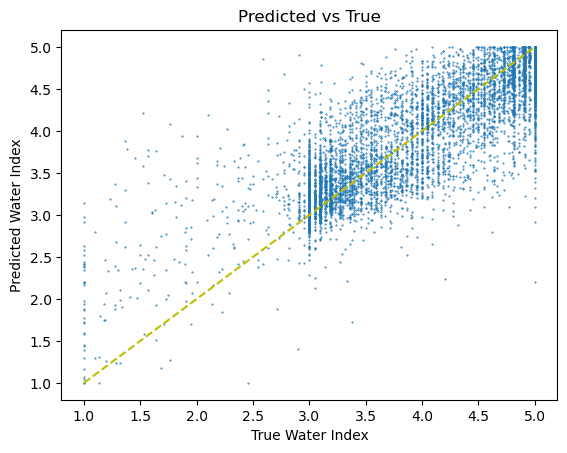

In [51]:
valid_preds = stack_rk.predict(p_valid_enc, x_valid)
valid_preds = np.clip(valid_preds, 1.0, 5.0)
plt.scatter(y_valid, valid_preds, s=0.2)
plt.plot(np.arange(1,6), np.arange(1,6), 'y--')
plt.xlabel('True Water Index')
plt.ylabel('Predicted Water Index')
plt.title('Predicted vs True')
plt.show()

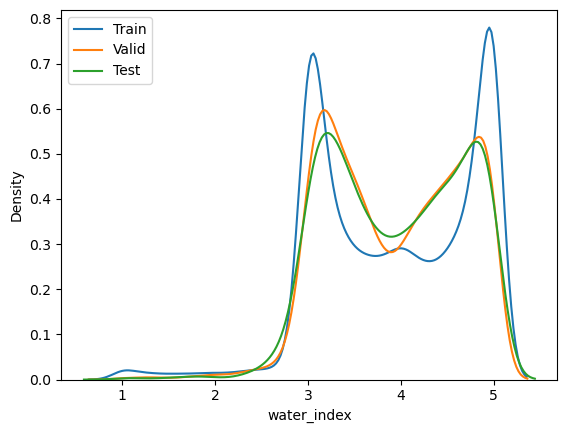

In [52]:
import seaborn as sns
sns.kdeplot(geotrain['water_index'], label='Train')
sns.kdeplot(valid_preds, label='Valid')
sns.kdeplot(preds, label='Test')
plt.legend()
plt.show()

In [53]:
pd.DataFrame(
    data=stack_rk.regression_model.final_estimator_.coef_.flatten(),
    index=regressors.keys(),
    columns=["Coefficient"],
).sort_values("Coefficient", ascending=False)

Coefficient
LightGBM     0.863665
XGBoost      0.143393

In [54]:
test['water_index'] = preds
submission = test[['DHSID_EA', 'water_index']]
submission

DHSID_EA  water_index
0     IA-2015-7-00010009     5.000000
1     IA-2015-7-00010011     4.941308
2     IA-2015-7-00010017     4.230307
3     IA-2015-7-00010044     4.521303
4     IA-2015-7-00010060     5.000000
...                  ...          ...
2670  IA-2015-7-00360403     5.000000
2671  IA-2015-7-00360454     4.735105
2672  IA-2015-7-00360474     4.949320
2673  IA-2015-7-00360476     4.462901
2674  IA-2015-7-00360479     4.665972

[2675 rows x 2 columns]

In [55]:
submission.to_csv('test.csv', index=False)

In [56]:
# normally available in sklearn>=1.1 (I believe) but kaggle containers are really out of date
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [57]:
feat_imp = pd.DataFrame({'feature': pipe[-1].get_feature_names_out(get_feature_names(pipe[-2])),
                         'importance': lgbm_rk.regression_model.feature_importances_}
                       ).sort_values(by='importance', ascending=False)
feat_imp

feature  importance
7                            pipeline__pca_y         627
3                         pipeline__rot_30_x         596
0                      pipeline__asset_index         594
5                        pipeline__city_dist         554
1                         pipeline__rot_45_x         460
6                            pipeline__pca_x         406
4                         pipeline__rot_30_y         314
17                 onehotencoder__x1_Manipur          72
19                onehotencoder__x1_Nagaland          44
23           onehotencoder__x1_Uttar Pradesh          37
9                    onehotencoder__x1_Bihar          32
8       onehotencoder__x1_Arunanchal Pradesh          24
16          onehotencoder__x1_Madhya Pradesh          21
2                         pipeline__rot_45_y          18
24             onehotencoder__x1_West Bengal          15
22              onehotencoder__x1_Tamil Nadu          14
10            onehotencoder__x1_Chhattisgarh           6
12               onehotencoder__x1_Jharkhand           4
20                  onehotencoder__x1_Odisha           3
13               onehotencoder__x1_Karnataka           1
18               onehotencoder__x1_Meghalaya           0
21                  onehotencoder__x1_Sikkim           0
15             onehotencoder__x1_Lakshadweep           0
14                  onehotencoder__x1_Kerala           0
11  onehotencoder__x1_Dadara & Nagar Havelli           0
25                     onehotencoder__x1_nan           0
26                       onehotencoder__x2_3           0

In [58]:
import shap

lgbm_explainer = shap.TreeExplainer(lgbm_rk.regression_model)
test_lgbm_shap_values = lgbm_explainer.shap_values(p_test_enc)

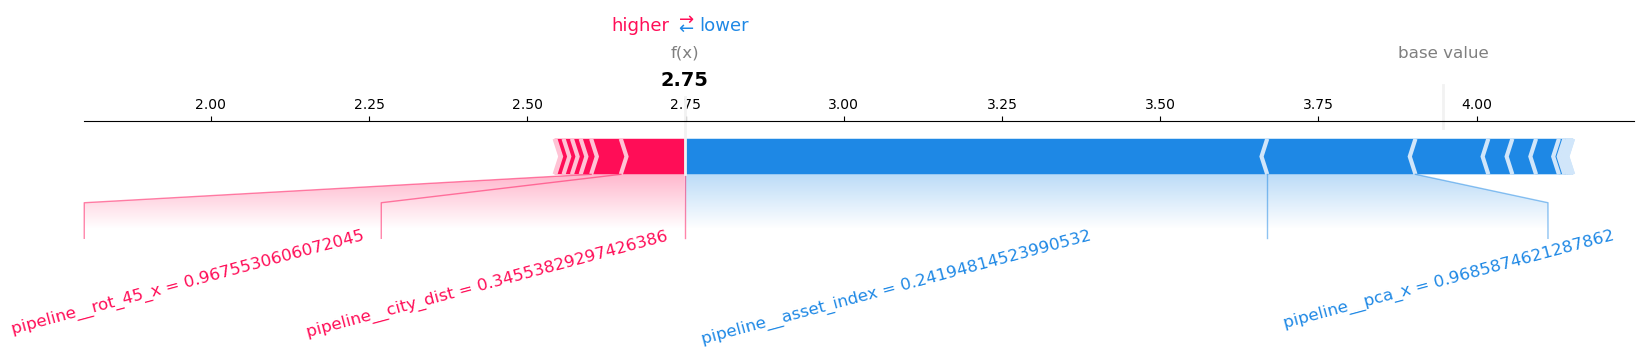

In [59]:
# lower asset index pushes water index prediction down (as expected)
shap.force_plot(
    lgbm_explainer.expected_value, # average water index
    test_lgbm_shap_values[62, :], # SHAP values associated with the example we want to explain
    pd.DataFrame(p_test_enc, columns=pipe[-1].get_feature_names_out(get_feature_names(pipe[-2]))).iloc[62, :], # Feature vector of the example 
    matplotlib=True,
    text_rotation = 15
)

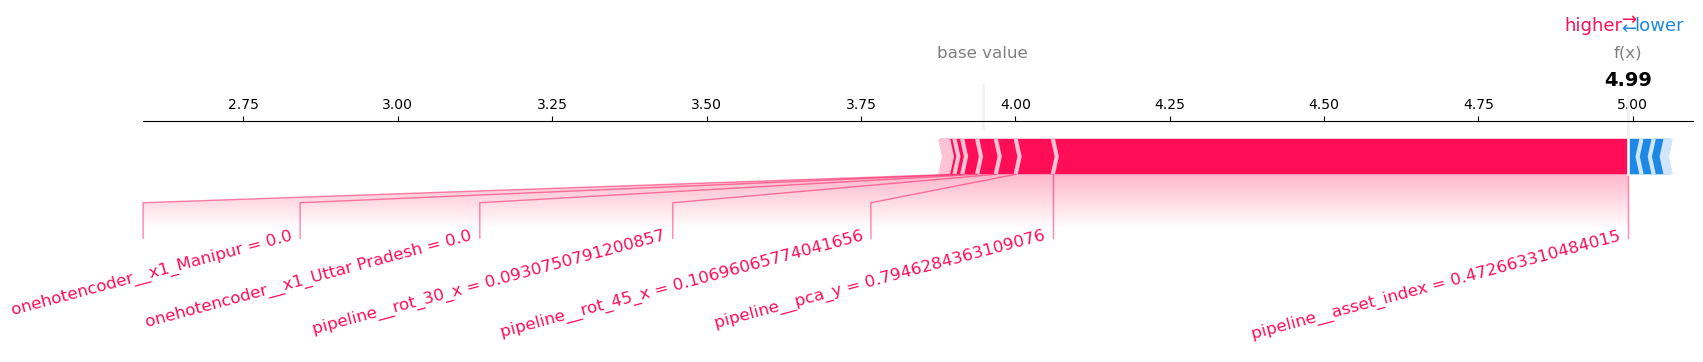

In [60]:
# higher asset index pushes water index prediction up (as expected)
shap.force_plot(
    lgbm_explainer.expected_value, # average water index
    test_lgbm_shap_values[0, :], # SHAP values associated with the example we want to explain
    pd.DataFrame(p_train_enc, columns=pipe[-1].get_feature_names_out(get_feature_names(pipe[-2]))).iloc[0, :], # Feature vector of the example 
    matplotlib=True,
    text_rotation=15
)

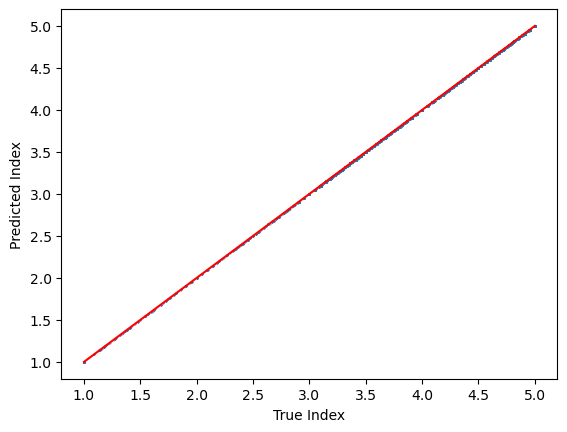

In [61]:
# pretty large amount of overfitting
train_preds = stack_rk.predict(p_train_enc, x_train)
plt.scatter(y_train, train_preds, s=0.1)
plt.plot(np.arange(1, 6), np.arange(1, 6), c='red')
plt.xlabel('True Index')
plt.ylabel('Predicted Index')
plt.show()

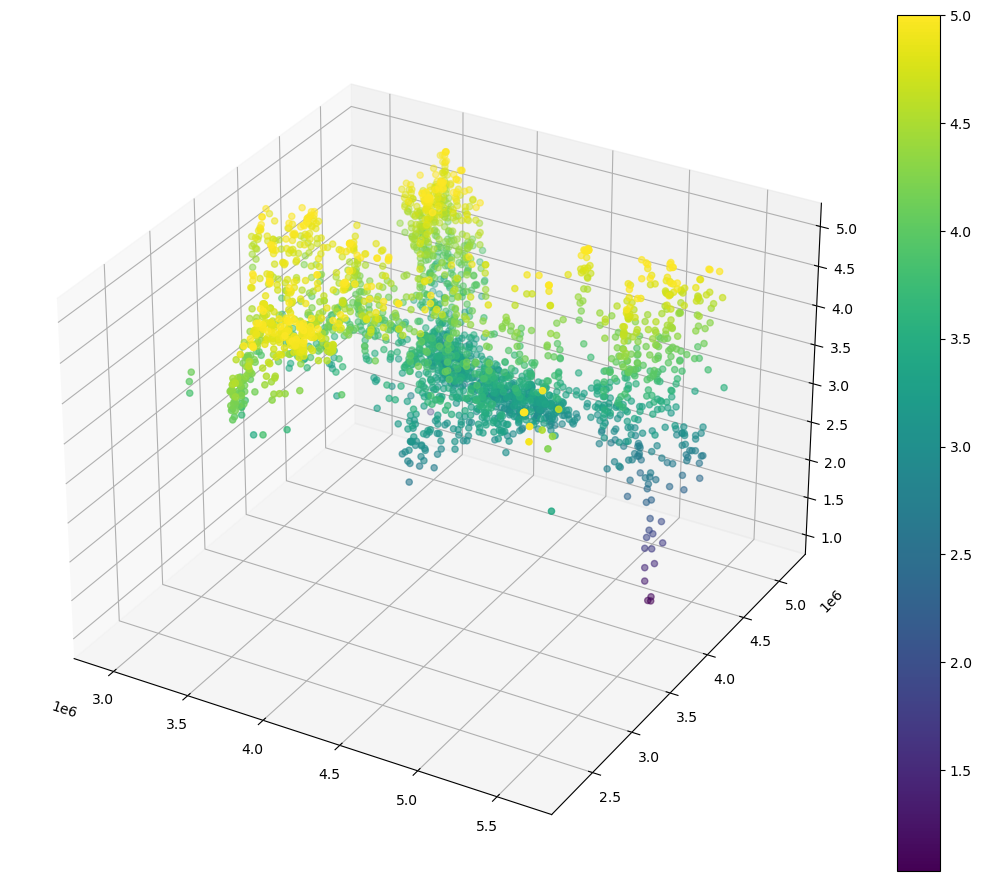

In [62]:
figure = plt.figure(figsize=(12, 12), facecolor='w')
ax = figure.add_subplot(111, projection='3d')
p = ax.scatter3D(geotest['Easting'], geotest['Northing'], preds,
                 c=preds, cmap='viridis')
figure.colorbar(p, fraction=0.046, pad=0.04)
plt.show()

In [63]:
geotest.explore(column=preds)

In [64]:
# regression only
X_train = geotrain.drop(columns=['Easting', 'Northing', 'water_index'])
target = geotrain['water_index']

In [65]:
import sklearn.model_selection

X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(X_train, target, test_size=0.2, random_state=88)

In [66]:
param_test = {'lgbmregressor__learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
              'lgbmregressor__n_estimators' : [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
              'lgbmregressor__num_leaves': sp_randint(6, 50), 
              'lgbmregressor__min_child_samples': sp_randint(100, 500), 
              'lgbmregressor__min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
              'lgbmregressor__subsample': sp_uniform(loc = 0.2, scale = 0.8), 
              'lgbmregressor__max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],
              'lgbmregressor__colsample_bytree': sp_uniform(loc = 0.4, scale = 0.6),
              'lgbmregressor__reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
              'lgbmregressor__reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

rand_search_lgbm = RandomizedSearchCV(
    estimator = make_pipeline(transformer, rfe, LGBMRegressor()), param_distributions = param_test, 
    n_iter = 100,
    scoring = 'r2',
    cv = 5,
    refit = True,
    random_state = 42,
    verbose = True
)

rand_search_lgbm.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('quantiletransformer',
                                                                                                QuantileTransformer(n_quantiles=4))]),
                                                                               ['asset_index',
                                                                                'x_cart',
                                                                                'y_cart',
                                            

In [67]:
rand_search_lgbm.best_estimator_.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('quantiletransformer',
                                                                   QuantileTransformer(n_quantiles=4))]),
                                                  ['asset_index', 'x_cart',
                                                   'y_cart', 'z_cart',
                                                   'rot_45_x', 'rot_45_y',
                                                   'rot_30_x', 'rot_30_y',
                                                   'city_dist', 'pca_x',
                                                   'pca_y']),
                                                 ('onehotencoder',
                   

In [68]:
train_preds = rand_search_lgbm.best_estimator_.predict(X_train)
r2_score(y_train, train_preds)

0.8358565664419154

In [69]:
valid_preds = rand_search_lgbm.best_estimator_.predict(X_valid)
r2_score(y_valid, valid_preds)

0.7498907515316089

In [70]:
test_preds = rand_search_lgbm.best_estimator_.predict(geotest.drop(columns=['Easting', 'Northing']))
test_preds = np.clip(test_preds, 1.0, 5.0)
new_sub = test.copy()
new_sub['water_index'] = test_preds
new_sub = new_sub[['DHSID_EA', 'water_index']]
new_sub

DHSID_EA  water_index
0     IA-2015-7-00010009     5.000000
1     IA-2015-7-00010011     4.815761
2     IA-2015-7-00010017     4.288119
3     IA-2015-7-00010044     4.664090
4     IA-2015-7-00010060     5.000000
...                  ...          ...
2670  IA-2015-7-00360403     4.974574
2671  IA-2015-7-00360454     4.771690
2672  IA-2015-7-00360474     4.796440
2673  IA-2015-7-00360476     4.556802
2674  IA-2015-7-00360479     4.406663

[2675 rows x 2 columns]

In [71]:
new_sub.to_csv('test_lgbm_only.csv', index=False)

In [72]:
# ensemble only
stacking_pipe = make_pipeline(transformer, rfe, stacking_model)
stacking_pipe.fit(X_train, y_train)
train_preds = stacking_pipe.predict(X_train)
r2_score(y_train, train_preds)

0.7639375466893641

In [73]:
valid_preds = stacking_pipe.predict(X_valid)
r2_score(y_valid, valid_preds)

0.7328463863661512

In [74]:
test_preds = stacking_pipe.predict(geotest.drop(columns=['Easting', 'Northing']))
test_preds = np.clip(test_preds, 1.0, 5.0)
new_sub = test.copy()
new_sub['water_index'] = test_preds
new_sub = new_sub[['DHSID_EA', 'water_index']]
new_sub

DHSID_EA  water_index
0     IA-2015-7-00010009     5.000000
1     IA-2015-7-00010011     4.863930
2     IA-2015-7-00010017     4.213387
3     IA-2015-7-00010044     4.490920
4     IA-2015-7-00010060     5.000000
...                  ...          ...
2670  IA-2015-7-00360403     4.993873
2671  IA-2015-7-00360454     4.770831
2672  IA-2015-7-00360474     4.847955
2673  IA-2015-7-00360476     4.396855
2674  IA-2015-7-00360479     4.468211

[2675 rows x 2 columns]

In [75]:
new_sub.to_csv('test_stack_only.csv', index=False)